# LBP histogram Dissimilarity metrics: Euclidean vs KL-Divergence

In [1]:
import numpy as np
from skimage import io, color
from skimage.feature import local_binary_pattern
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

In [2]:
couscous = io.imread('https://i.stack.imgur.com/u3xLI.png')
knitwear = io.imread('https://i.stack.imgur.com/Zj14J.png')
unknown = io.imread('https://i.stack.imgur.com/JwP3j.png')

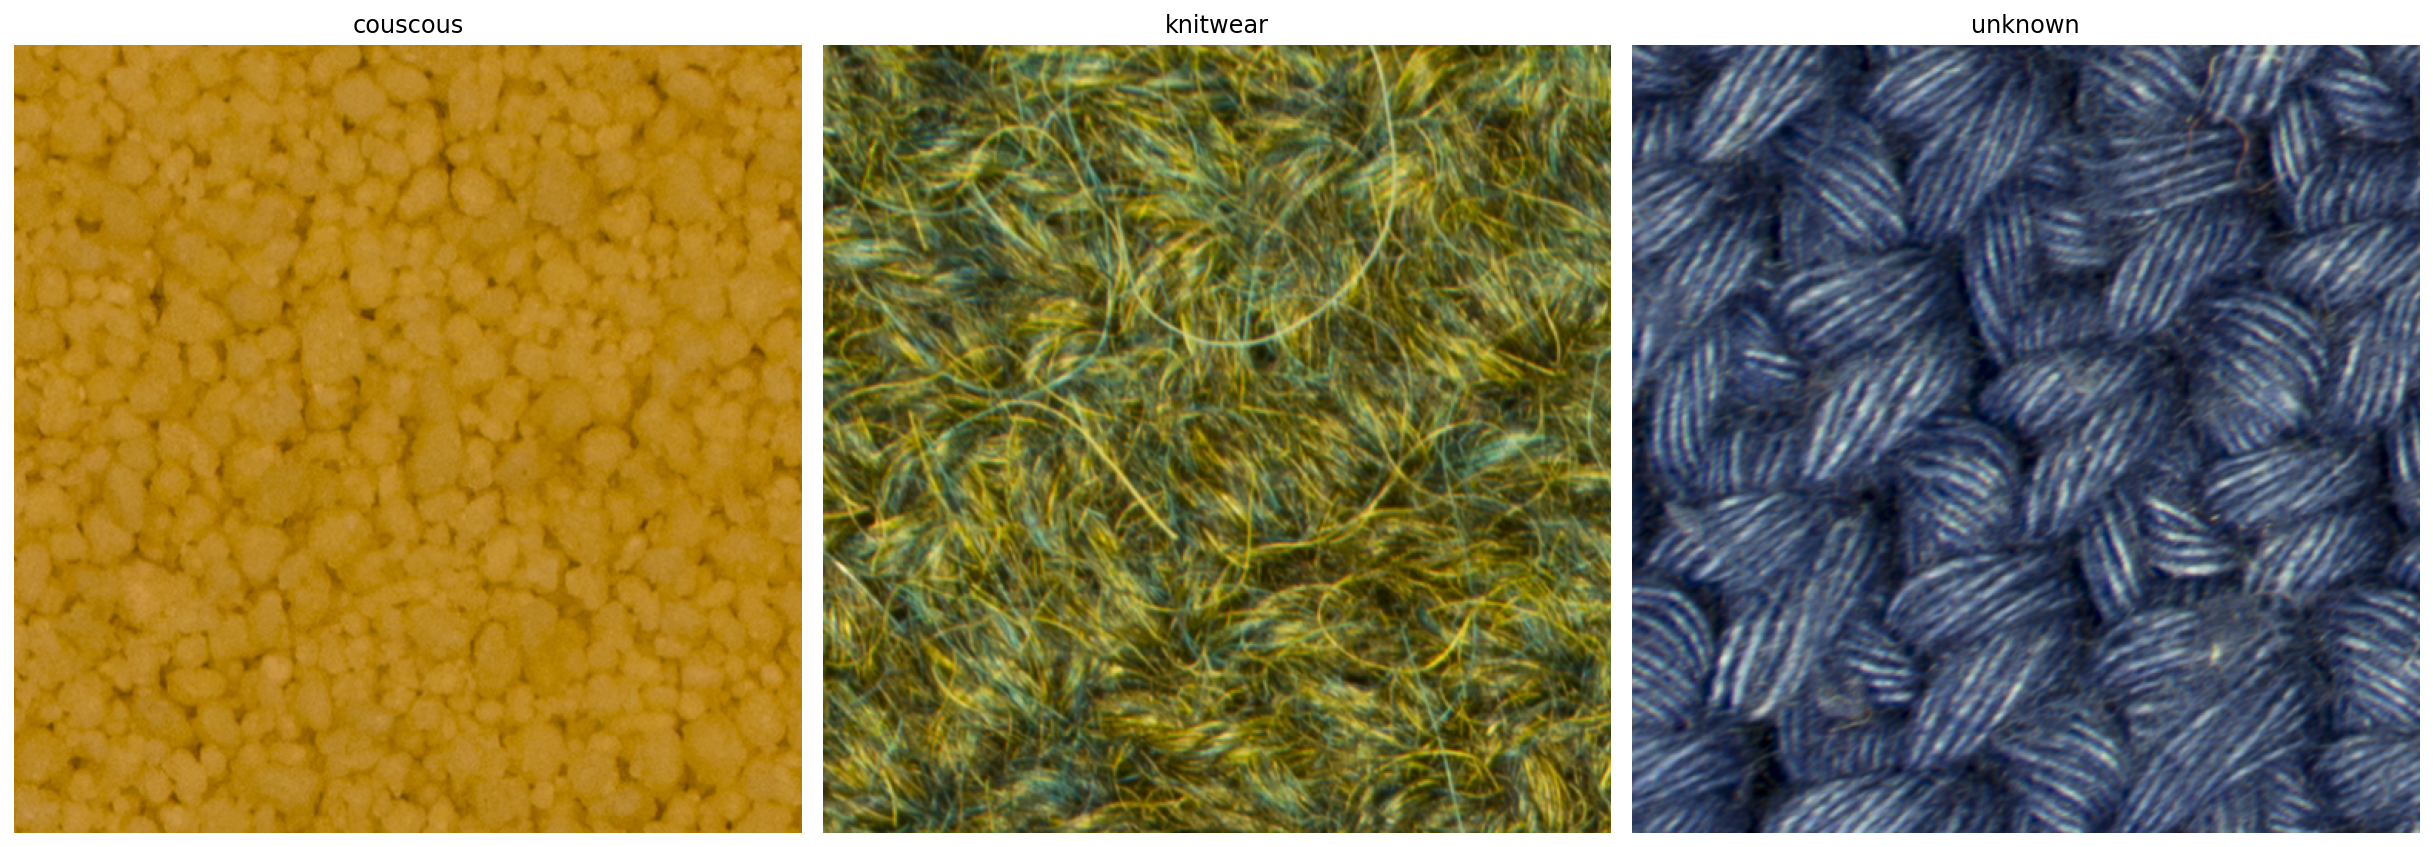

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(17,8))
ax[0].axis('off')
ax[0].set_title('couscous')
ax[0].imshow(couscous)
ax[1].axis('off')
ax[1].set_title('knitwear')
ax[1].imshow(knitwear)
ax[2].axis('off')
ax[2].set_title('unknown')
ax[2].imshow(unknown)
fig.tight_layout()

In [4]:
# Return smaller of either Kullback–Leibler Divergences
def kld(p, q):
    p_q = np.sum(p * np.log2(p/q))
    q_p = np.sum(q * np.log2(q/p))
    if p_q < 0 or q_p < 0:
        print(p); print(q); print(sum)
        raise Exception
    return min(p_q, q_p)

In [5]:
# Local Binary Pattern Histogram
def lbp_histogram(color_image):
    img = color.rgb2gray(color_image)
    # patterns = local_binary_pattern(img, 8, 1, 'default')
    # hist, _ = np.histogram(patterns, bins=np.arange(256 + 1), density=True)
    patterns = local_binary_pattern(img, 8, 1, 'uniform')
    hist, _ = np.histogram(patterns, bins=np.arange(10 + 1))
    return hist

- Tried with both Default (256-bin) and Uniform (59-bin) LBP encoding -- Uniform results in greater dissimilarity. Also, with much fewer bins, it would be more appropriate for a small 32x32=1024 pixels cell size.

In [6]:
couscous_feats = lbp_histogram(couscous)
knitwear_feats = lbp_histogram(knitwear)
unknown_feats = lbp_histogram(unknown)

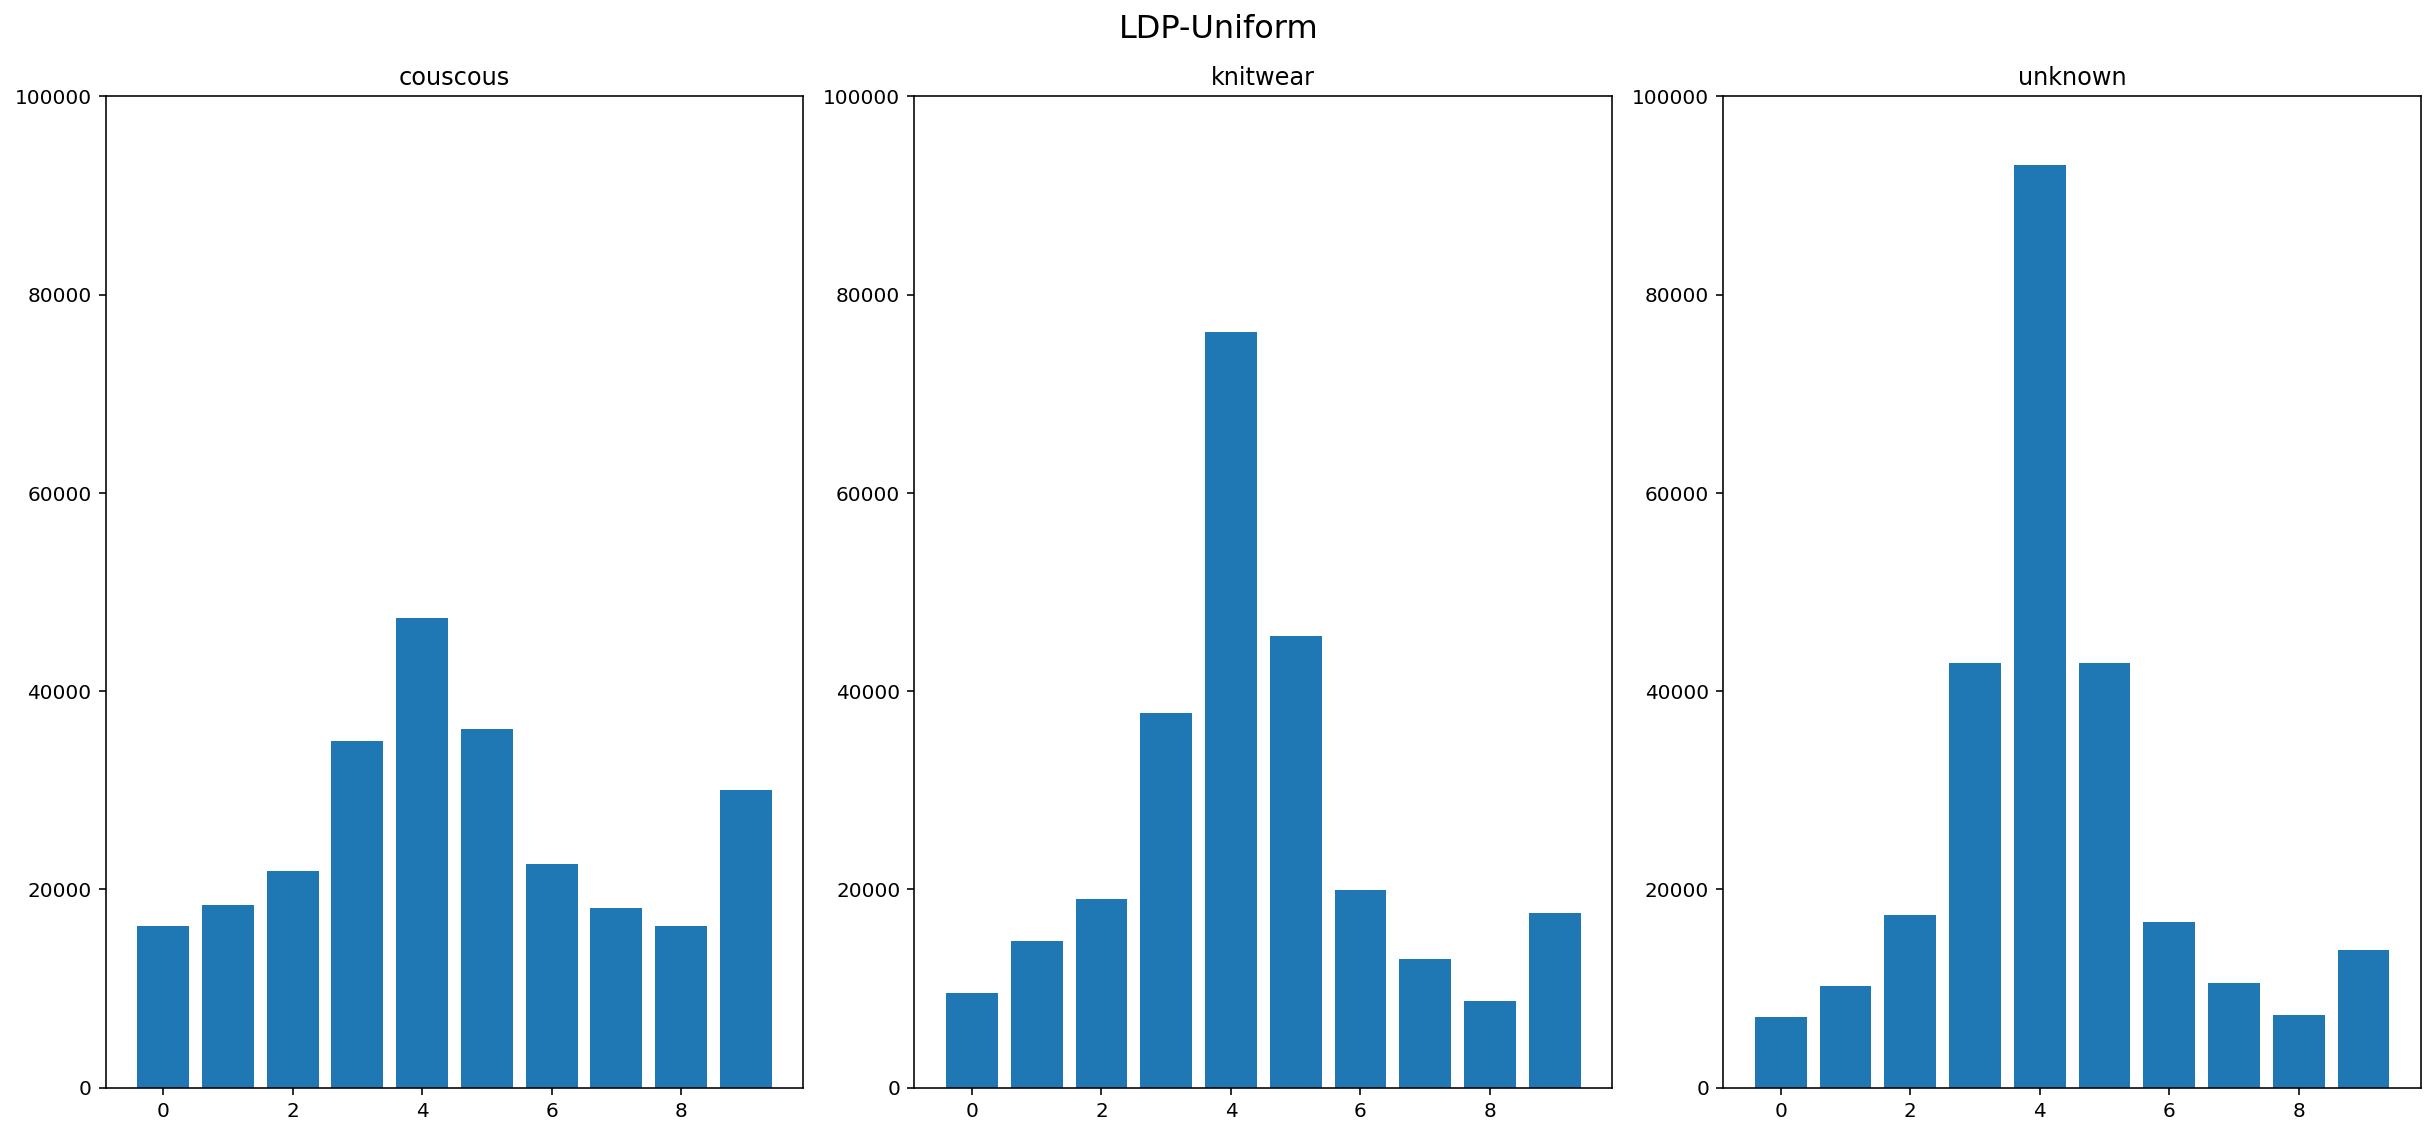

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(17,8))
ax[0].set_title('couscous')
ax[0].set_ylim(0, 100000)
ax[0].bar(np.arange(len(couscous_feats)), couscous_feats)
ax[1].set_title('knitwear')
ax[1].set_ylim(0, 100000)
ax[1].bar(np.arange(len(knitwear_feats)), knitwear_feats)
ax[2].set_title('unknown')
ax[2].set_ylim(0, 100000)
ax[2].bar(np.arange(len(unknown_feats)), unknown_feats)
fig.suptitle('LDP-Uniform', fontsize=16)
fig.tight_layout()

In [8]:
euc_couscous = euclidean(unknown_feats, couscous_feats)
euc_knitwear = euclidean(unknown_feats, knitwear_feats)
print(f'{euc_couscous:.0f}, {euc_knitwear:.0f}, {euc_couscous/euc_knitwear:.2f}')

52874, 19460, 2.72


In [9]:
kld_couscous = kld(unknown_feats + 1, couscous_feats + 1)
kld_knitwear = kld(unknown_feats + 1, knitwear_feats + 1)
print(f'{kld_couscous:.0f}, {kld_knitwear:.0f}, {kld_couscous/kld_knitwear:.2f}')

51482, 6363, 8.09


- Above results show KL-Divergence is a much better discriminator than Euclidean Distance